### Importação das bibliotecas necessárias

In [1]:
!pip install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 36.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Base de dados de crédito

clientid - ID ou poderia ser o nome - variavel nominal

income - Renda anual, variavel numérica continua

age - idade - variavel numérica continua pode ser int

loan - dívida que a pessoa possui

defaulted 0 - pagou 1 - não pagou

In [ ]:
base_credit = pd.read_csv('/content/drive/MyDrive/BCC/MachineLearningDataScience/credit_data.csv')
base_credit #

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
#base_credit.head(10) # visualizar o inicio
#base_credit.tail(10) # visualizar o final

count = total

mean = media

std = desvio padrão

min = minimo

max = maximo

In [ ]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [ ]:
base_credit[base_credit['income'] >= 69995.685578] # busca pelo salario

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [ ]:
base_credit[base_credit['loan'] <= 1.377630] # busca pela divida

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


### Visualização dos dados

In [ ]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

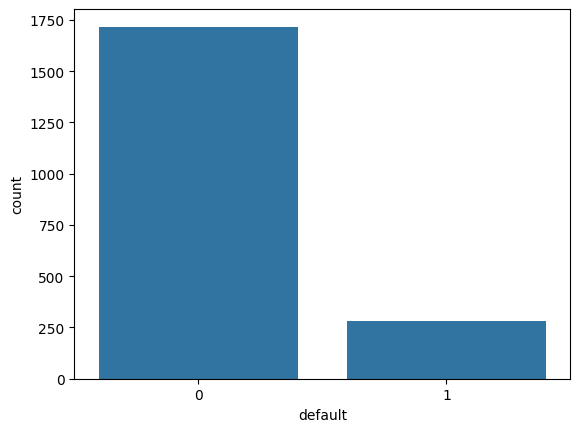

In [ ]:
sns.countplot(x = base_credit['default']); # grafico de não pagou e pagou

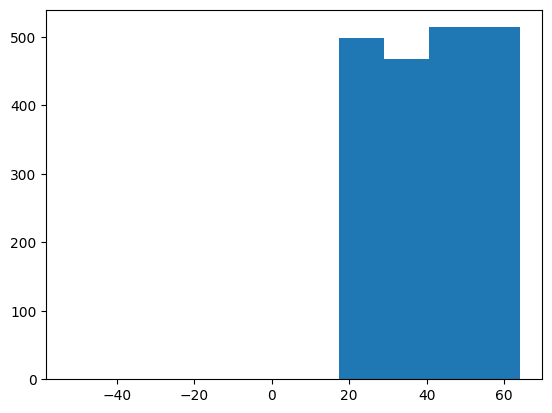

In [ ]:
plt.hist(x = base_credit['age']); # grafico da idade

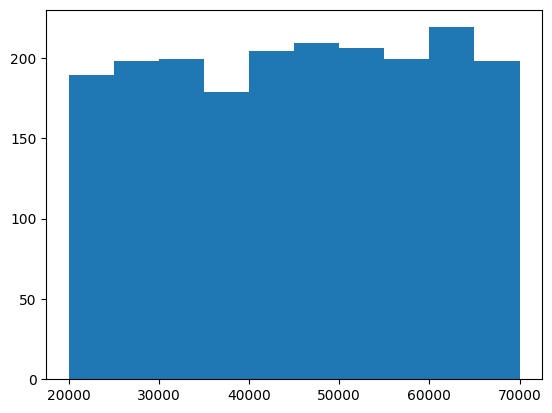

In [ ]:
plt.hist(x = base_credit['income']);

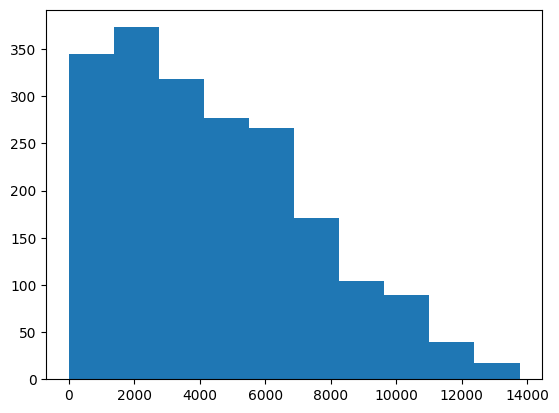

In [ ]:
plt.hist(x = base_credit['loan']);

In [ ]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default')
grafico.show()

###Tratamento de valores inconsistentes

Tratamento de valores faltantes

Divisão entre previsores e classe

Escaloamento dos valores

In [ ]:
base_credit.loc[base_credit['age'] < 0] # ou base_credit[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
# Apagar a coluna inteira (de todos os registros < 0 da base de dados)
base_credit2 = base_credit.drop('age', axis = 1)
base_credit2

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [ ]:
# Apagar somente os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
base_credit3.loc[base_credit3['age'] < 0]

,clientid,income,age,loan,default


In [ ]:
# preencher os valores inconsistente manualmente
# preencher com a média
base_credit3['age'].mean()

40.92770044906149

In [ ]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92 # adicionar a média para os valores menores que 0

In [ ]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default


In [ ]:
base_credit.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [ ]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default')
grafico.show()

###Tratamento de valores faltantes ou nulos


In [ ]:
base_credit.isnull().sum() # total de valores nulos

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])] # onde estão

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)# preencher valores nulos na coluna age com a média

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])] # onde estão

,clientid,income,age,loan,default


In [ ]:
base_credit.loc[base_credit['clientid'].isin([29,31,32])]# visualizar se os valores foram alterados

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [ ]:
# x_credit = variavel para armazenar os previsores
x_credit = base_credit.iloc[:,1:4].values # coluna 1 ao 3 sera passada para a variavel, e convertida para o formato numpy
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
type(x_credit) # verrificar se os dados estao em numpy

numpy.ndarray

In [ ]:
# y_credit = variavel para armazenar as classes
y_credit = base_credit.iloc[:,4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
type(y_credit) # verrificar se os dados estao em numpy

numpy.ndarray

###Escalonamento dos valores

In [ ]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [ ]:
x_credit[:,0].max(),x_credit[:,1].max(),x_credit[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

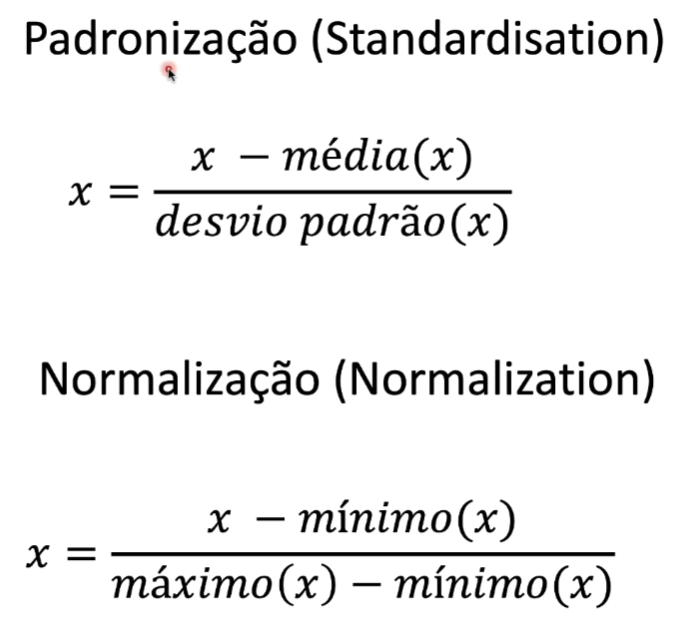

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(x_credit) # Padronização de x_credit


In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [ ]:
X_credit[:,0].max(),X_credit[:,1].max(),X_credit[:,2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

###Divisão da base em treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

###Salvar as variaveis

In [ ]:
import pickle

In [ ]:
with open('credit2.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste],f)

In [ ]:
!pwd
!ls

/content
credit2.pkl  drive  sample_data


In [ ]:
# movido para o drive
!mv credit2.pkl /content/drive/MyDrive/BCC/MachineLearningDataScience